# Project: Medical Insurance Cost Prediction

## 1. Importing the Dependencies

In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## 2. Data Collection & Analysis

In [43]:
# Load dataframe from csv to Pandas Dataframe
insurance_dataset = pd.read_csv("insurance.csv")
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [44]:
# Understand the data
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
# Number of rows and columns
insurance_dataset.shape

(1338, 7)

In [46]:
# getting information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Feature 
- Sex
- Smoker
- Region


In [47]:
# check for missing value
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [48]:
#Check for duplicate value
#insurance_dataset.duplicated().sum()

In [49]:
# Drop that duplicate
#insurance_dataset = insurance_dataset.drop_duplicates()

In [50]:
insurance_dataset.duplicated().sum()

np.int64(1)

In [51]:
# Statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\ayush\AppData\Local\Temp\ipykernel_25852\4100074944.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


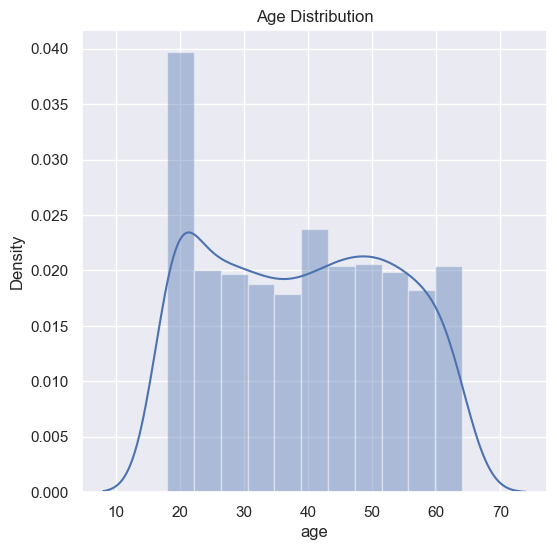

In [52]:
# Disribution on age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

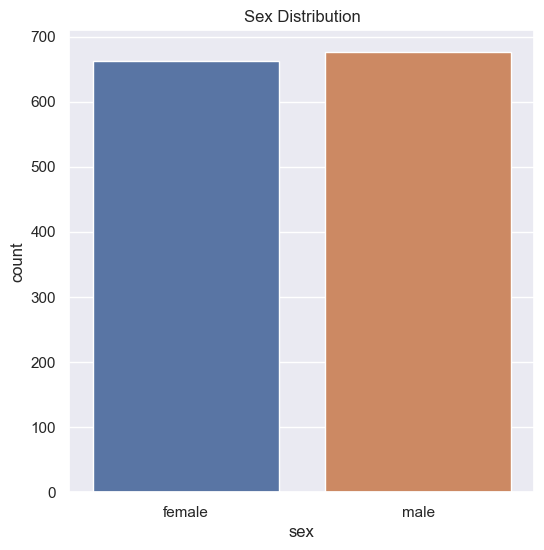

In [53]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data= insurance_dataset,hue = 'sex')
plt.title('Sex Distribution')
plt.show()
           

In [54]:
# count number of male and female
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\ayush\AppData\Local\Temp\ipykernel_25852\928385425.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


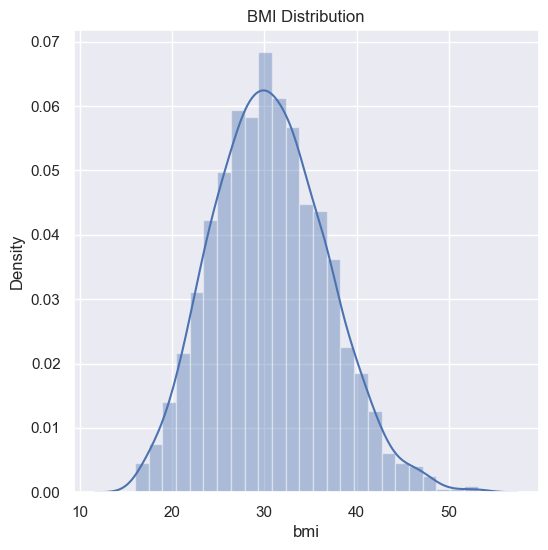

In [55]:
# bmi distribution
plt.figure(figsize =(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()


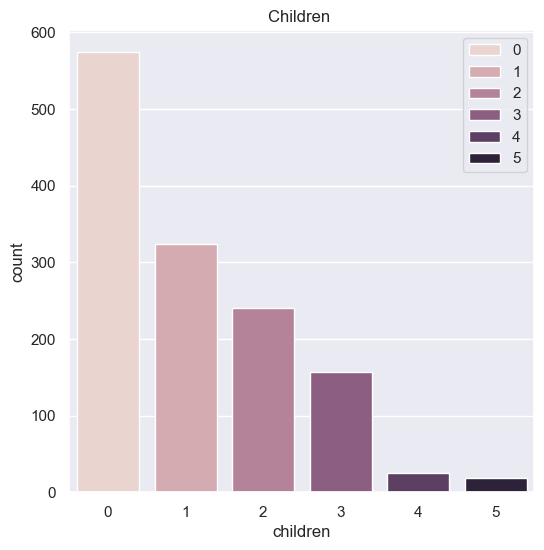

In [56]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data= insurance_dataset,hue = 'children')
plt.title('Children ')
plt.legend(loc = 'upper right')
plt.show()
           

In [57]:
# Exact Number
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

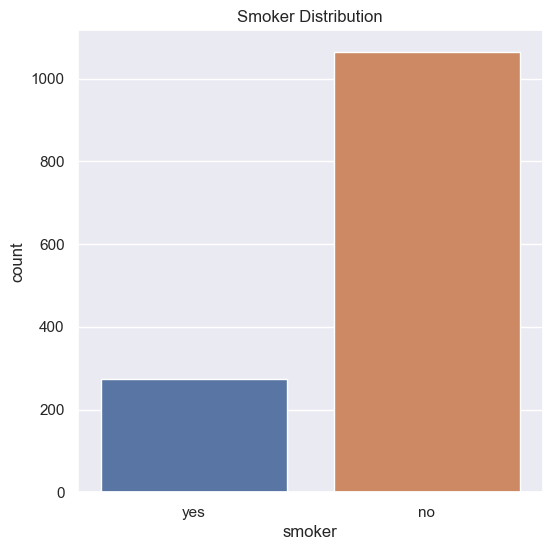

In [58]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data= insurance_dataset,hue = 'smoker')
plt.title('Smoker Distribution')
plt.show()

In [59]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

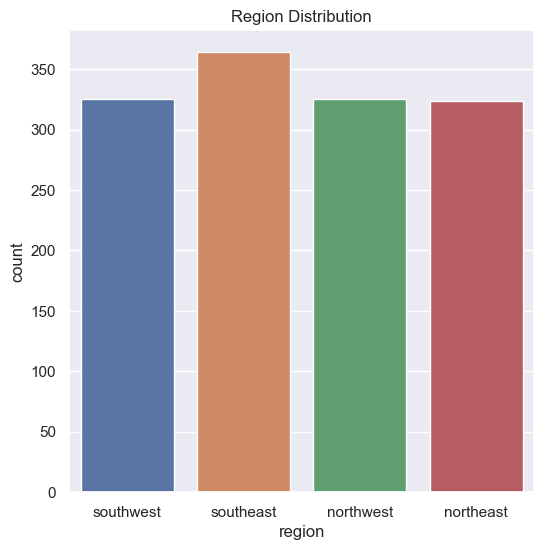

In [60]:
# Region distribution
plt.figure(figsize =(6,6))
sns.countplot(data = insurance_dataset,x='region',hue = 'region')
plt.title('Region Distribution')
plt.show()


In [61]:
# how many people lives where
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\ayush\AppData\Local\Temp\ipykernel_25852\1454983849.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


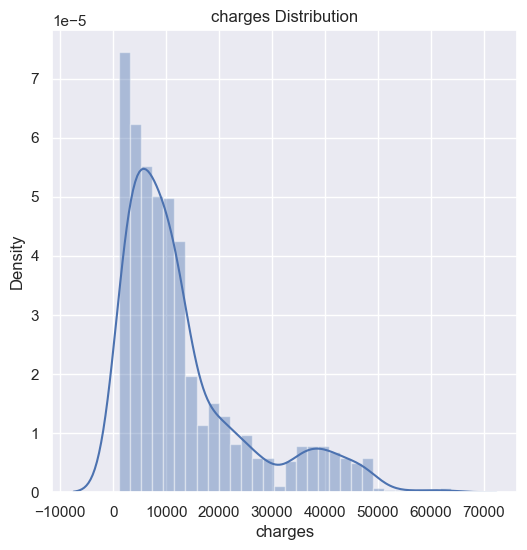

In [62]:
#  distribution of charges
plt.figure(figsize =(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges Distribution')
plt.show()

In [63]:
# In machine Learning model always use numerical values

## Data Pre- Processing

In [64]:
# Encoding 'sex' colums
insurance_dataset.replace({'sex':{'male':0, 'female':1}},inplace=True)

# Encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

# Encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1,'northeast':2,'northwest':3}},inplace=True)



C:\Users\ayush\AppData\Local\Temp\ipykernel_25852\259341693.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0, 'female':1}},inplace=True)
C:\Users\ayush\AppData\Local\Temp\ipykernel_25852\259341693.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0, 'no':1}},inplace=True)
C:\Users\ayush\AppData\Local\Temp\ipykernel_25852\259341693.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To

In [65]:
insurance_dataset.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


## Splitting the Feature and Target

In [66]:
# This (X) is Feature
X = insurance_dataset.drop(columns = 'charges', axis=1)#1 = columns
# This (Y) is Target
Y = insurance_dataset['charges']

In [67]:
# Feature are all parameter use in prediction
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [68]:
#Target 
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [69]:
# Splitting the Data into Training data 80% & Testing Data 20%
# That is 80% and 20% ratio

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)


In [71]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


## Modele Training
* Linear Regression
* Y = mX+c

In [72]:
# Loading the linear Regression
regressor = LinearRegression()

In [73]:
regressor.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
# Prediction on the training data
training_data_prediction = regressor.predict(X_train)

In [75]:
# R squered value 
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared Value:' , r2_train)

R Squared Value: 0.751505643411174


In [76]:
# Prediction on the test data
test_data_prediction = regressor.predict(X_test)

In [77]:
# R squered value 
r2_test= metrics.r2_score(Y_test, test_data_prediction)
print('R Squared Value:' , r2_test)

R Squared Value: 0.7447273869684077


## Building a Predictive System

In [79]:
#63,male,28.31,0,no,northwest,13770.00
input_data=(18,0,33.770,1,1,0)
# changing input data to numpy array
input_data_as_numpy_arr = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_arr.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)

###########################################
print(f'The Insurance cost Is {prediction[0]} USD')

The Insurance cost Is 3701.061578023093 USD


C:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
joblib.dump(regressor,"insurance_Model.pkl")
print("Model saved Successfully")